<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/density_of_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Calculation of density of gases
#@markdown Demonstration of ideal gas law and equations of state 
!pip install py4j
!pip install --upgrade -q gspread
!rm -rf testneqsim
!git clone https://github.com/EvenSol/testneqsim.git
!cd testneqsim
!pip install testneqsim/lib/neqsim-0.0.1-py3-none-any.whl
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Cloning into 'testneqsim'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 77 (delta 14), reused 5 (delta 1), pack-reused 43
Unpacking objects: 100% (77/77), done.


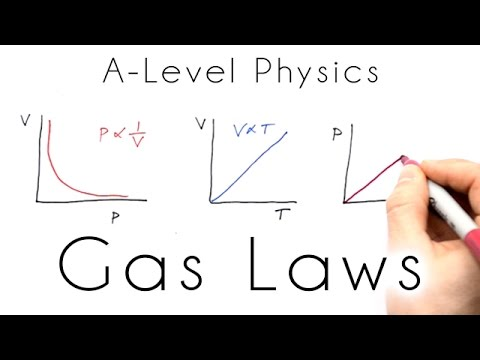

In [0]:
#@title Introduction to Gas Laws
#@markdown This video gives an intriduction to behavour of gases as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('QhnlyHV8evY', width=600, height=400)

# Comparison of ideal gas and real gas behaviour

In the following example we use the ideal gas law and the SRK-EOS to calculate the density of methane.  At low pressure we see that the ideal gas and the real density are the same, at pressures higher than 20 bar the real gas density is higher, while at pressures higher than 350 bar the ideal gas density is the highest. THe reason for this is that at intermediate pressures, the atractive forces is dominating, while at very high pressures repulsive forces starts to dominate.

molar mass of  methane  is  16.043  kg/mol


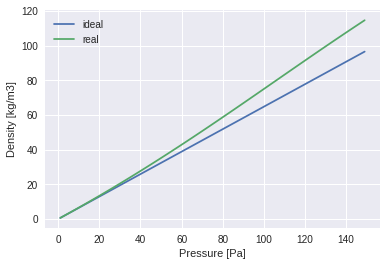

In [0]:
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2"]
temperature = 298.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.init(0); 

print('molar mass of ', componentName, ' is ', fluid1.getMolarMass()*1000 , ' kg/mol')

def idealgasdensity(pressure, temperature):
  m3permol = R*temperature/(pressure*1e5)
  m3perkg = m3permol/fluid1.getMolarMass()
  return 1.0/m3perkg

def realgasdensity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getDensity('kg/m3')

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
idealdensity = [idealgasdensity(P,temperature) for P in pressure]
realdensity = [realgasdensity(P,temperature) for P in pressure]

plt.plot(pressure, idealdensity)
plt.plot(pressure, realdensity)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Density [kg/m3]')
plt.legend(['ideal', 'real'])